In [ ]:
!pip install pycaret
#!pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 727.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5

In [ ]:
import gdown
import pandas as pd
import numpy as np
import warnings
url = 'https://drive.google.com/uc?export=download&id=1dScom60UHmtLpTA1HqP5S0rZaKYn9eB_'
output = 'Baubap ML Challenge'
gdown.download(url, output, quiet=False)
raw_data = pd.read_csv(output)
warnings.filterwarnings('ignore')

Downloading...
From: https://drive.google.com/uc?export=download&id=1dScom60UHmtLpTA1HqP5S0rZaKYn9eB_
To: /content/Baubap ML Challenge
100%|██████████| 175k/175k [00:00<00:00, 56.8MB/s]


**REACH THE HIGHEST ROC-AUC POSSIBLE FOR BINARY CLASSIFICATION ON THE FOLLOWING DATSET**

In [ ]:
raw_data.head()

,Id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
0,404070,0.166667,0.1869,0.250000,0,Category 1,0.865117,0.153228,5,0
1,274968,0.000000,0.0619,0.659091,0,Category 1,0.814533,0.000000,0,1
2,616071,0.111111,0.5236,0.431818,1,Category 3,0.753914,0.000000,2,1
3,644482,0.000000,0.6726,0.681818,0,Category 1,0.855076,0.000000,0,0
4,482818,0.388889,0.2186,0.295455,0,Category 1,0.764336,0.000000,2,1


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         2455 non-null   int64  
 1   feature_1  2455 non-null   float64
 2   feature_2  2455 non-null   float64
 3   feature_3  2455 non-null   float64
 4   feature_4  2455 non-null   int64  
 5   feature_5  2455 non-null   object 
 6   feature_6  2455 non-null   float64
 7   feature_7  2455 non-null   float64
 8   feature_8  2455 non-null   int64  
 9   target     2455 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 191.9+ KB


In [ ]:
print(raw_data['feature_5'].unique())

['Category 1' 'Category 3' 'Category 2']


In [ ]:
from sklearn.preprocessing import LabelEncoder

raw_data_copy = raw_data.copy()

encoder = LabelEncoder()

raw_data_copy['feature_5_encoded'] = encoder.fit_transform(raw_data_copy['feature_5'])

raw_data_copy.drop(columns=['Id','feature_5'], inplace=True)


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.4 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report Baubap_ML.html was generated.



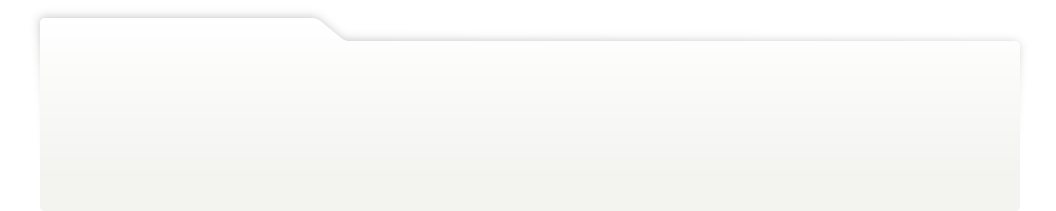
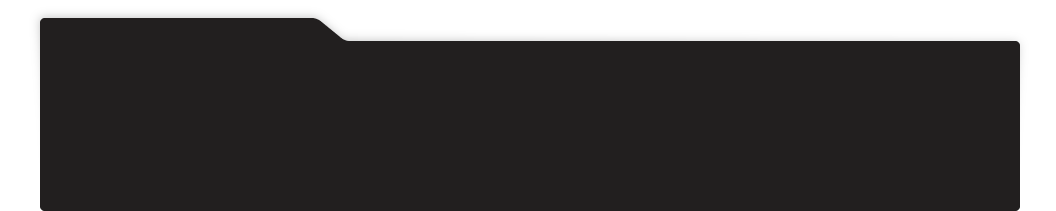
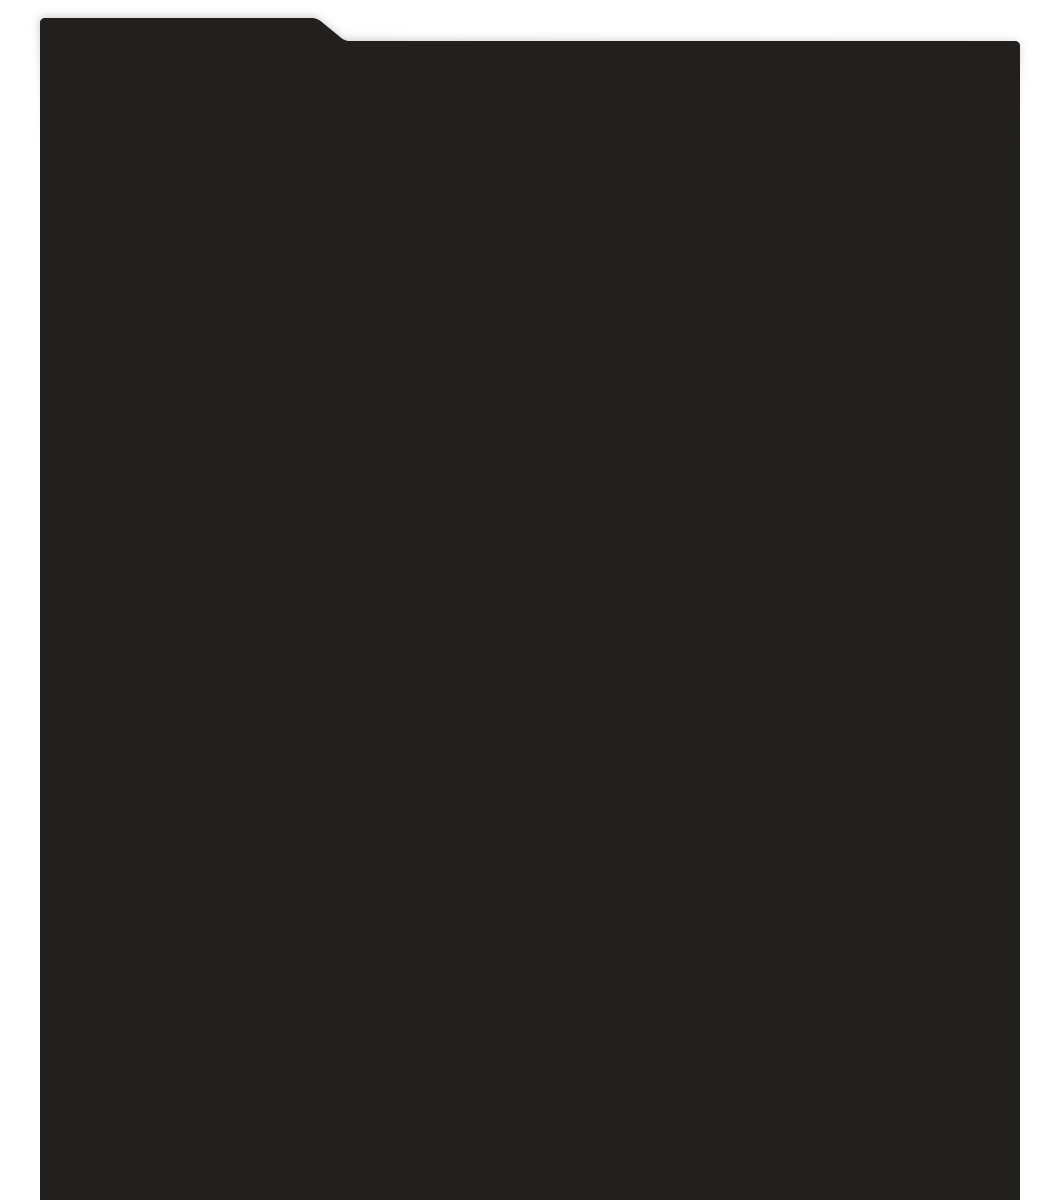
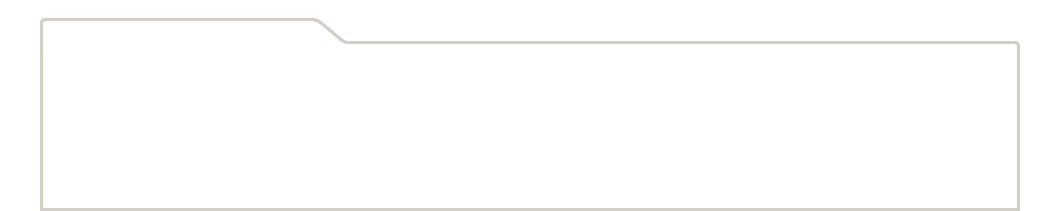
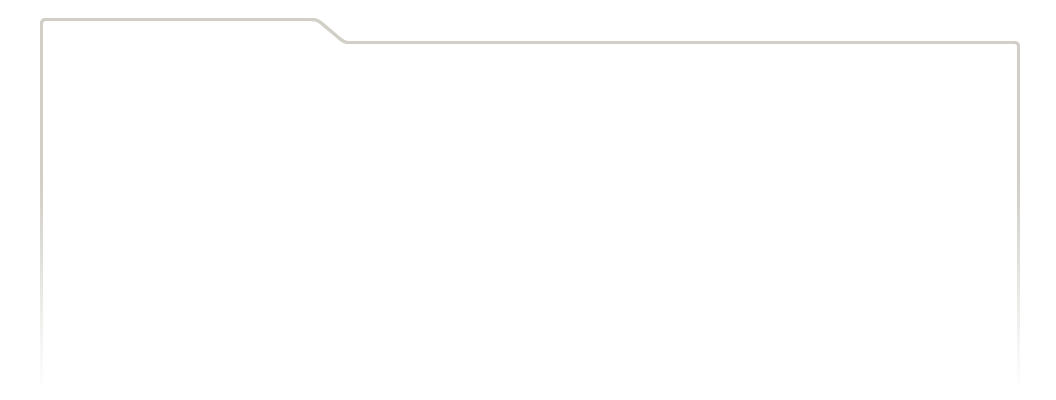
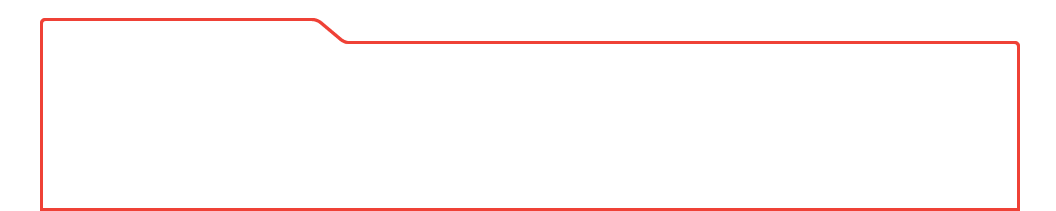
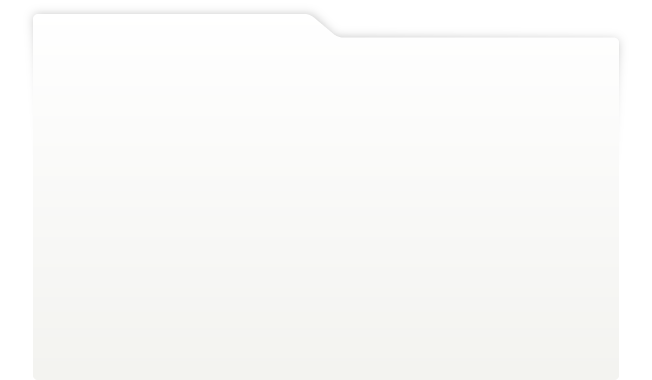
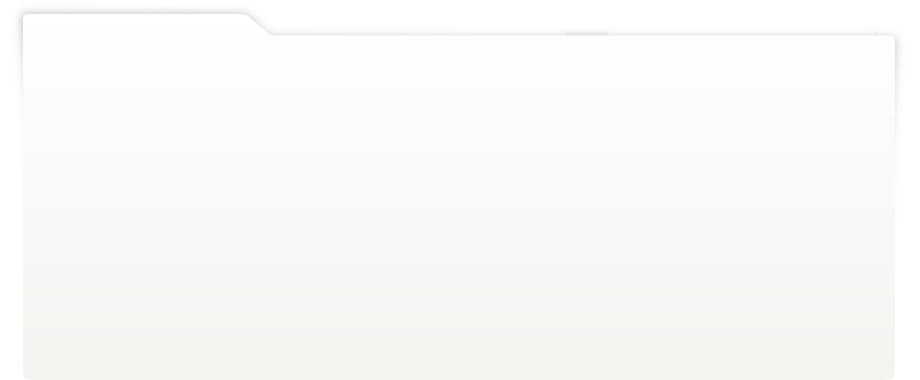
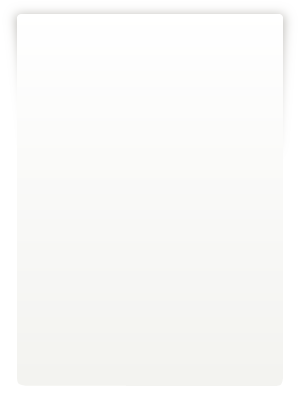
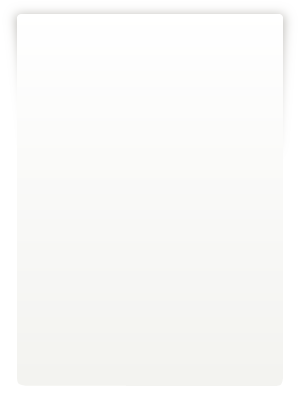
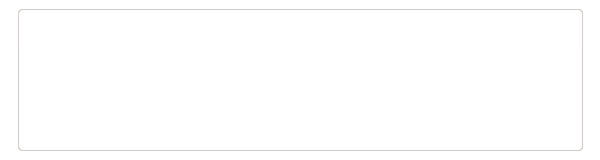
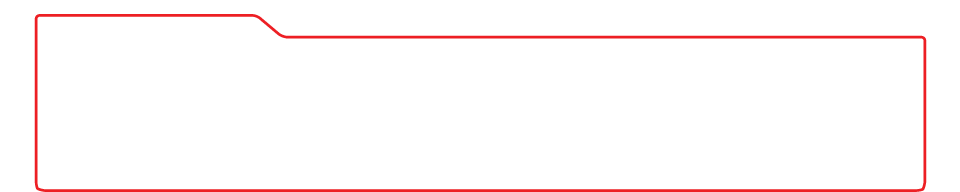
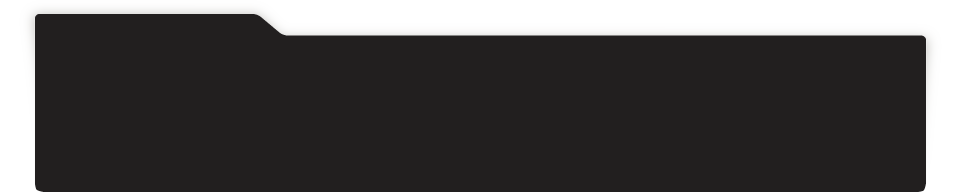
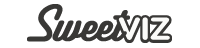
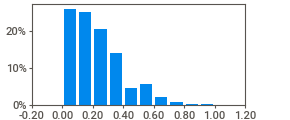
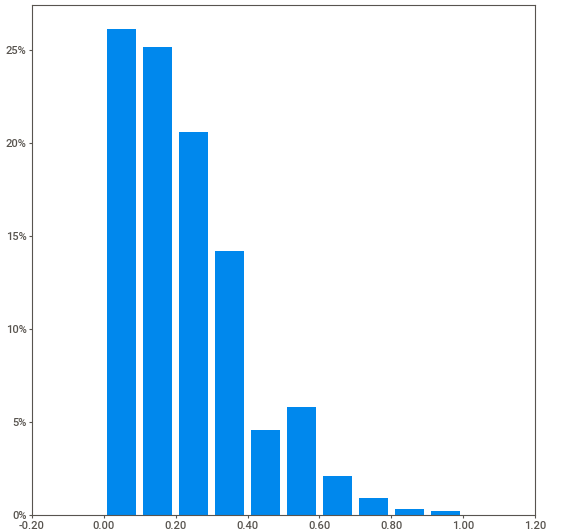
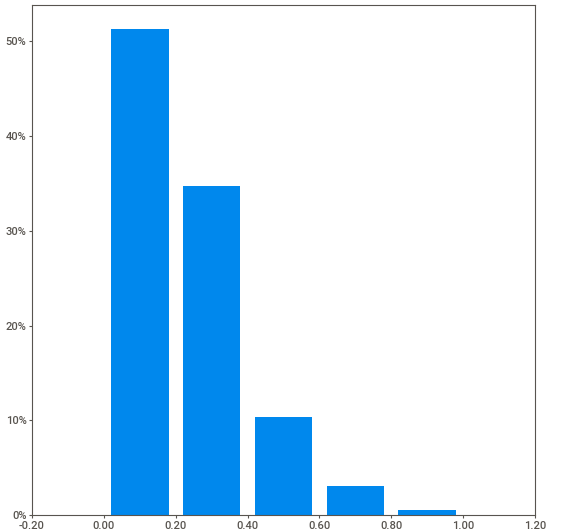
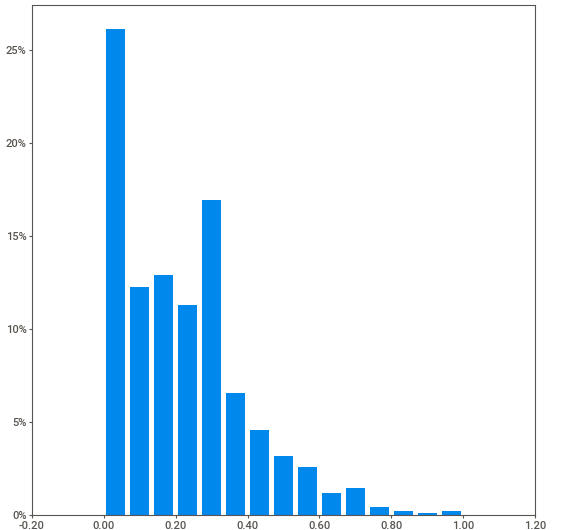
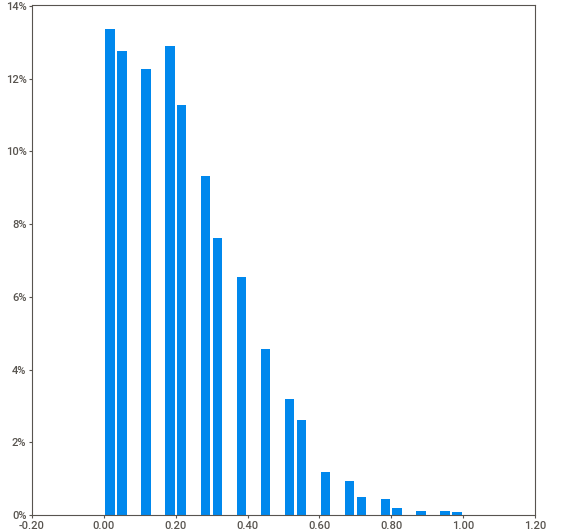
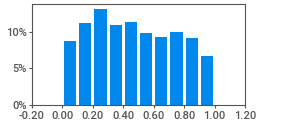
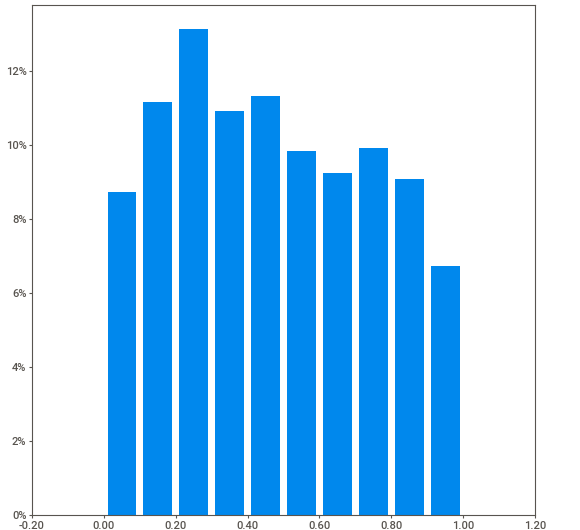
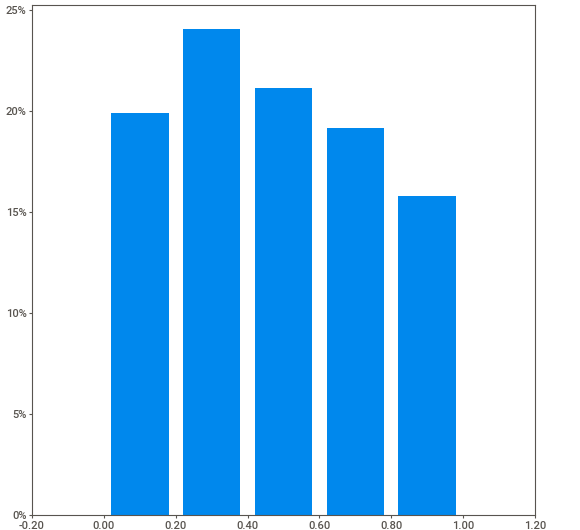
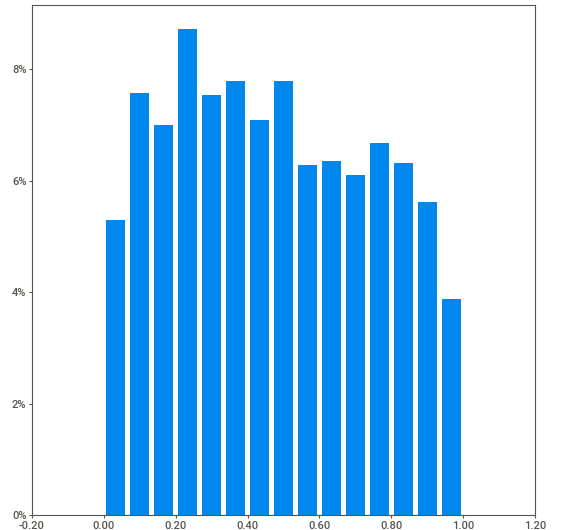
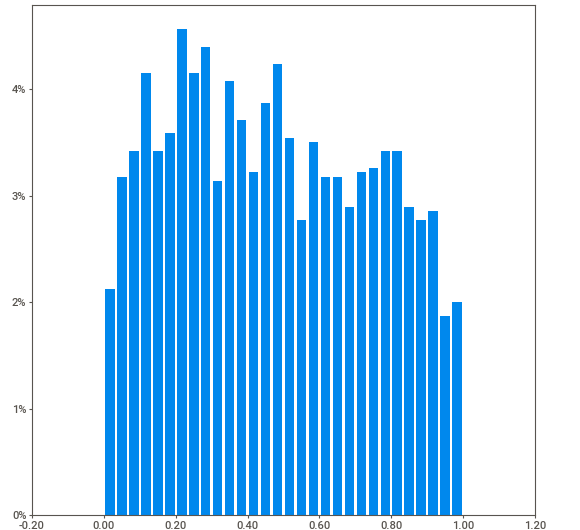
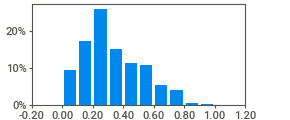
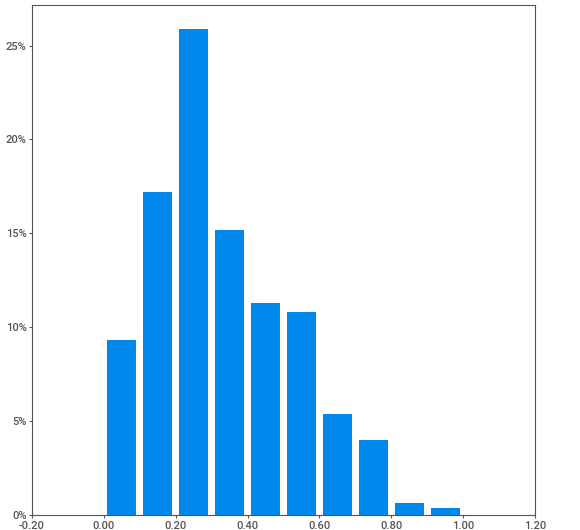
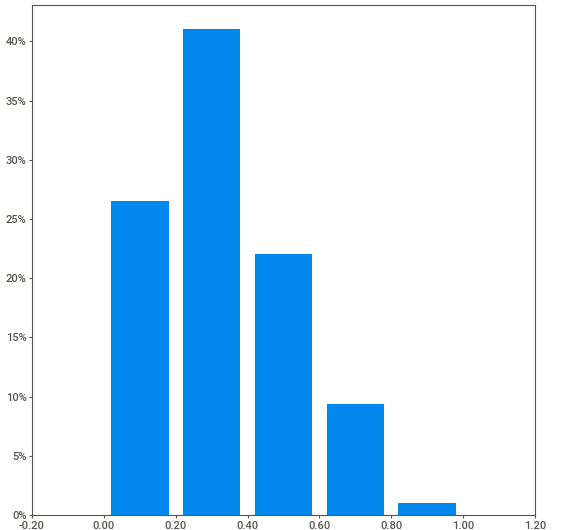
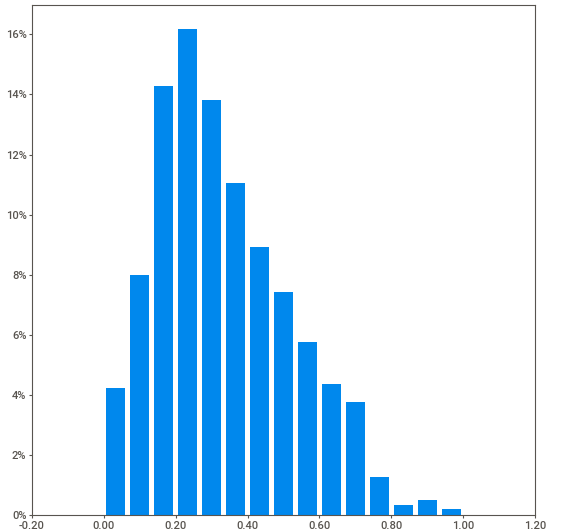
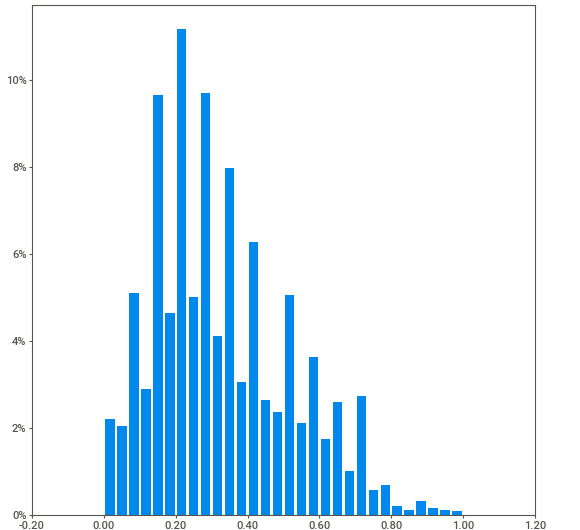
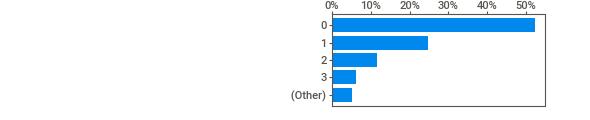
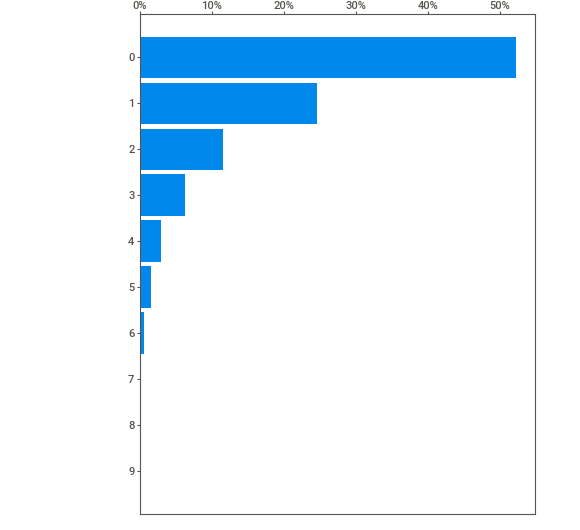
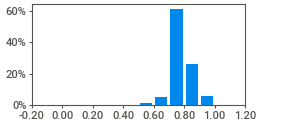
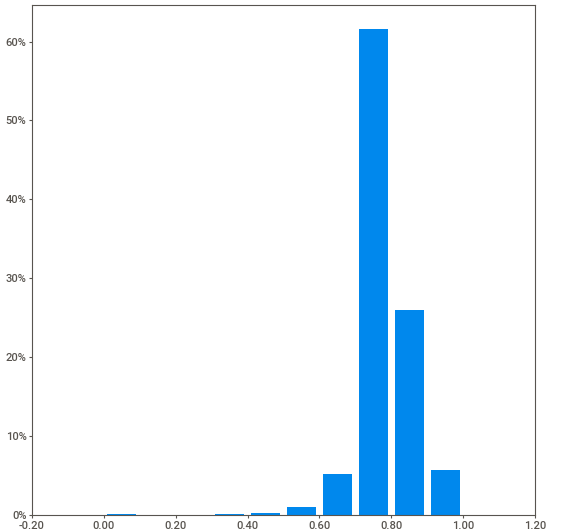
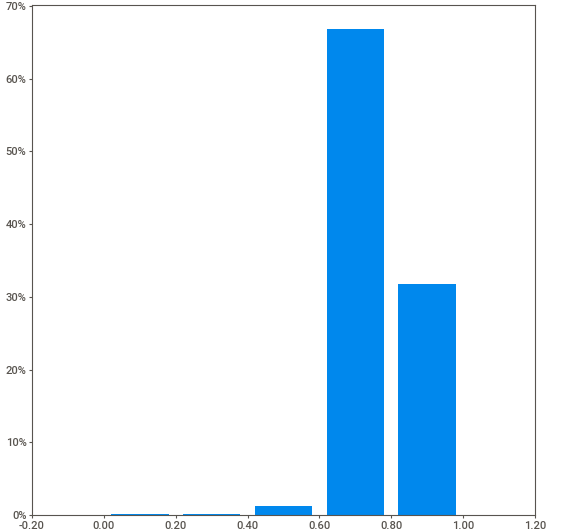
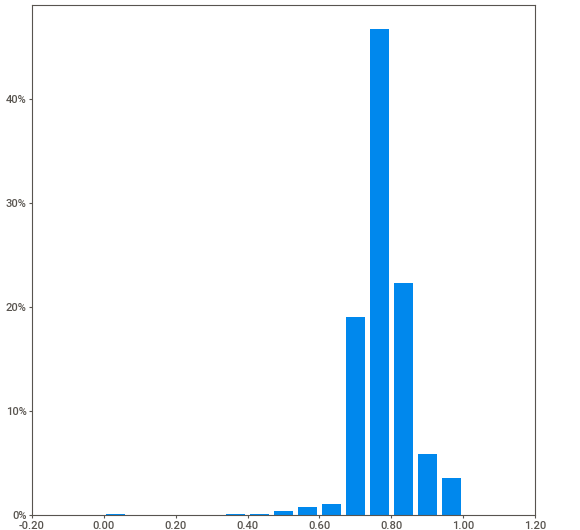
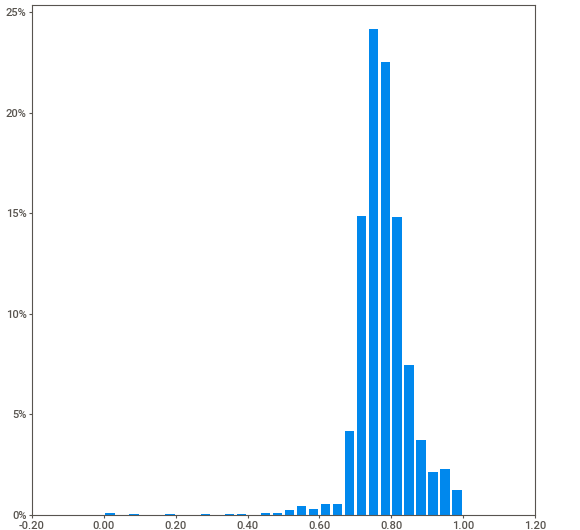
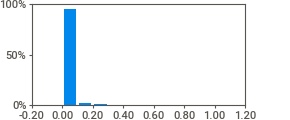
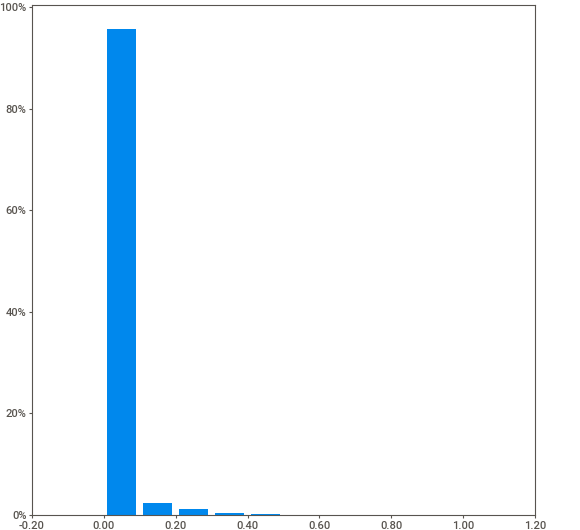
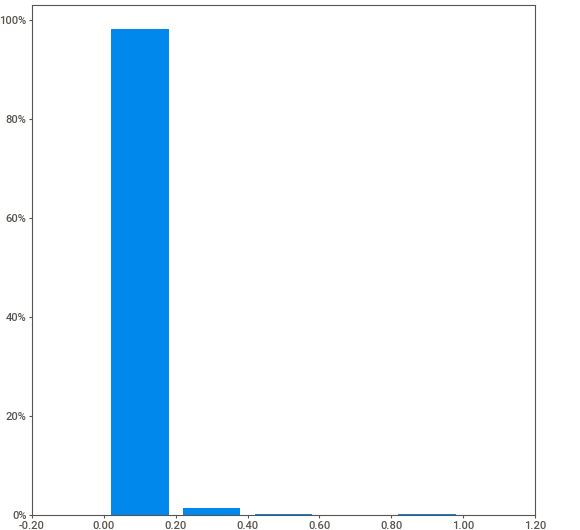
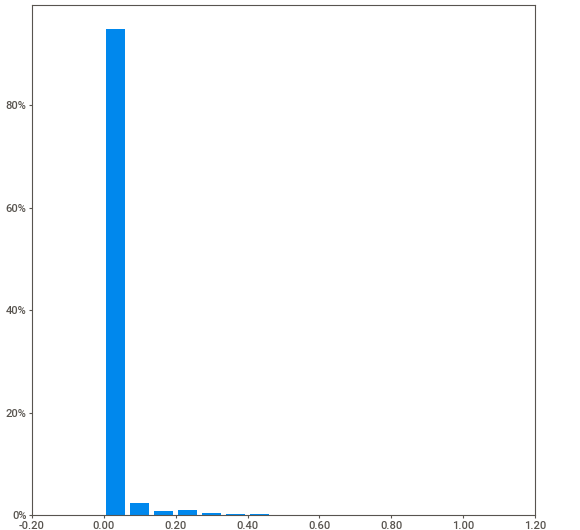
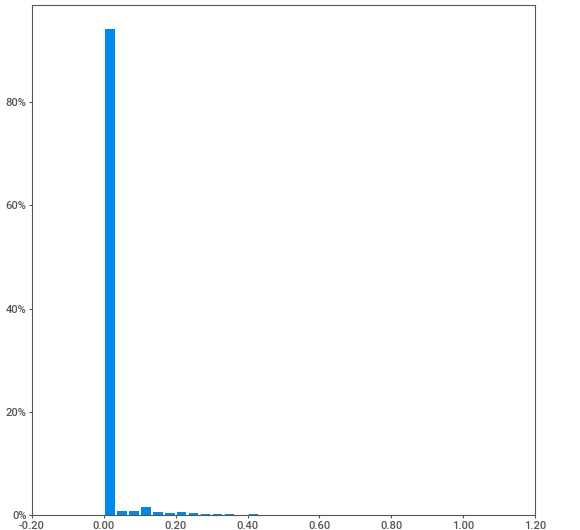
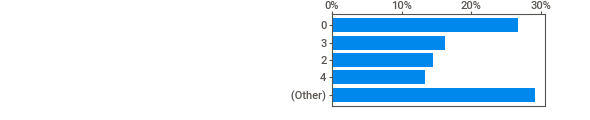
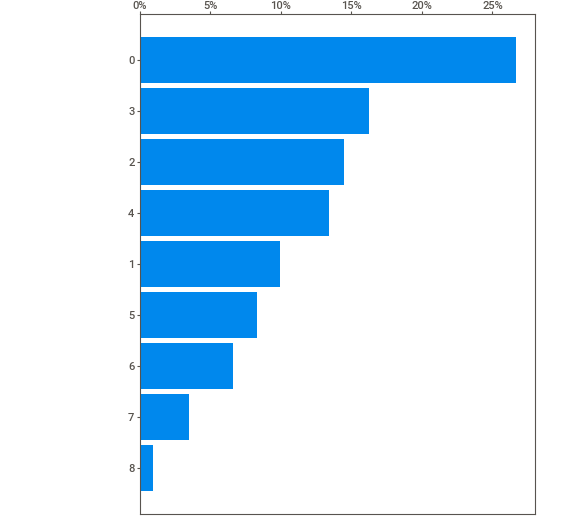
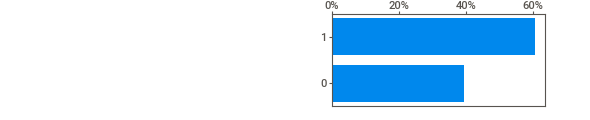
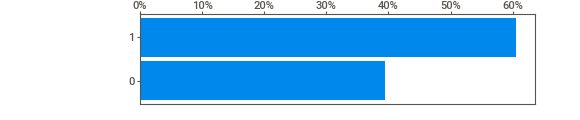
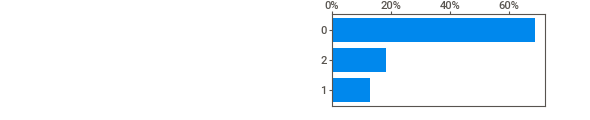
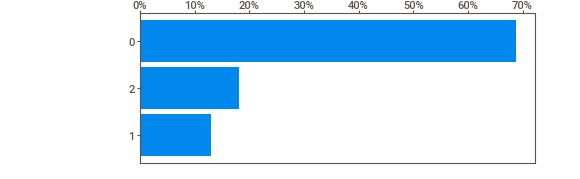
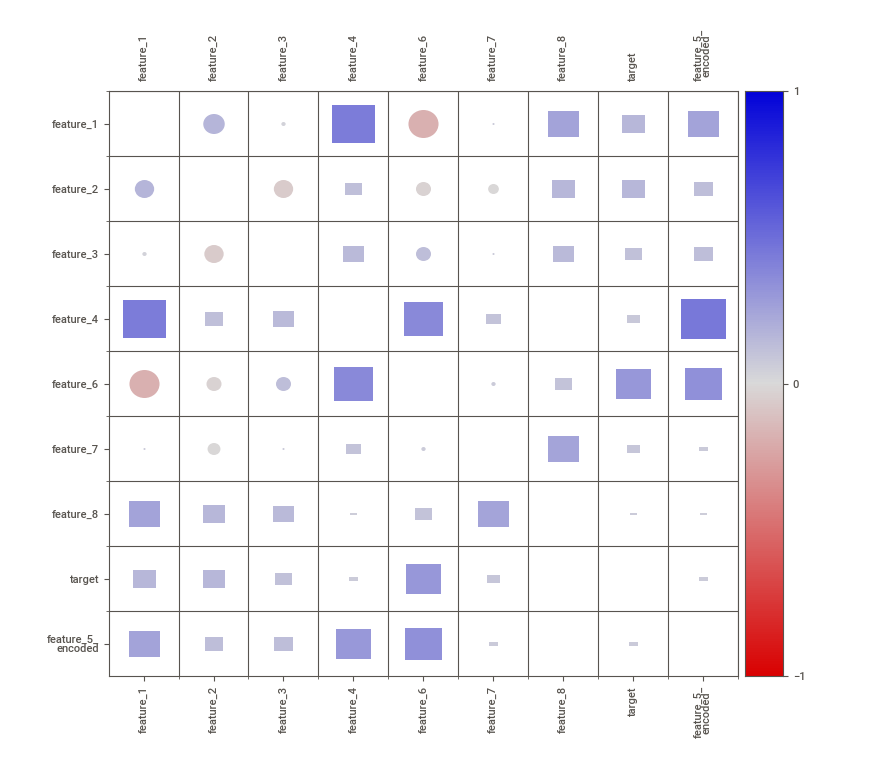
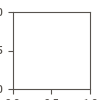

In [ ]:
import sweetviz as sv
import IPython
analyze_report = sv.analyze(raw_data_copy)
analyze_report.show_html('Baubap_ML.html', open_browser=False)
IPython.display.HTML('Baubap_ML.html')

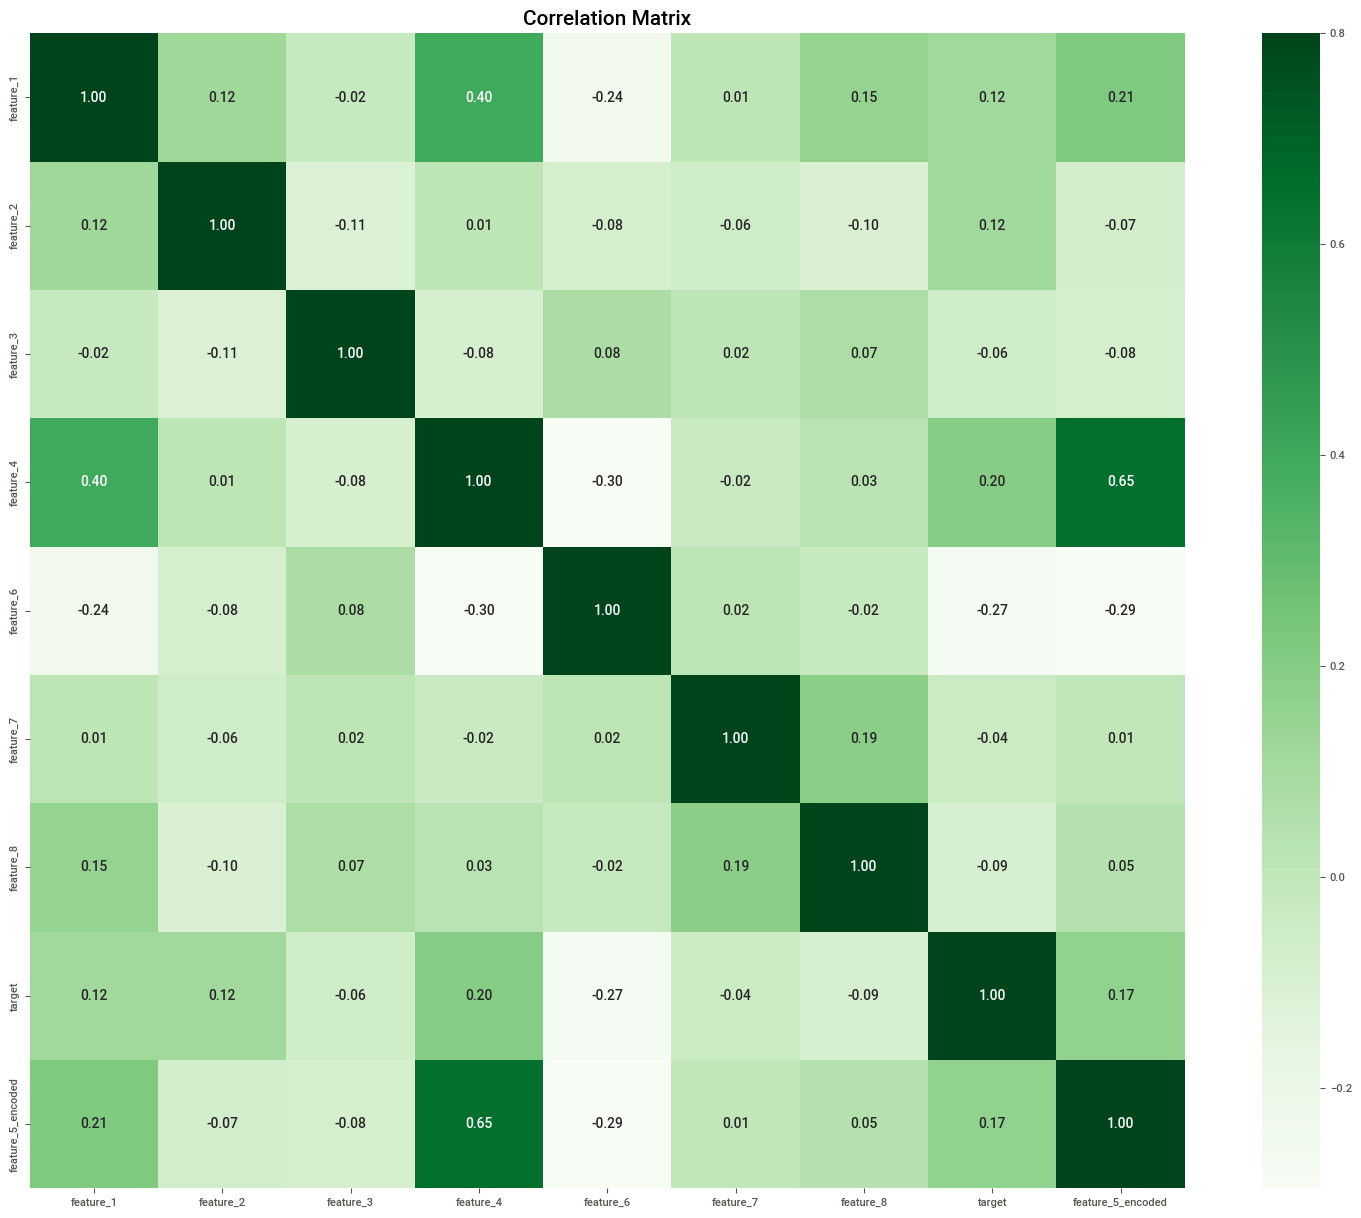

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(raw_data_copy.corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='Greens')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

# BenchMark Model

> **You should try to surpass or create a better model than the benchmark model, the benchmark model is just an example but you can create the model you consider better. **

*Feel free to explore various plots and gain a thorough understanding of the data. Aim to avoid biases regarding the benchmark model; your primary goal should be to exceed its score. During the interview, be prepared to discuss all the experiments you conducted and conclusions you reached in your quest to achieve the highest score*

##Exploración y Limpieza de Datos

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Input, Dense
from keras.models import Model
!pip install optuna
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
data = raw_data
data.drop(columns=['Id'], inplace=True)

In [ ]:
# Excluir la columna 'target' del conjunto de entrenamiento
training = data.drop(columns=['target'])

# Obtener la columna 'target' como el objetivo
target = data['target']

# Dividir el conjunto de datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

# Crear el DataFrame 'training' sin la variable 'target'
training = X_train.copy()

# Crear el DataFrame 'test' con la variable 'target'
test = pd.concat([X_test, y_test], axis=1)

# Verificar las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento:", training.shape)
print("Forma del conjunto de prueba:", test.shape)

Forma del conjunto de entrenamiento: (1964, 8)
Forma del conjunto de prueba: (491, 9)


In [ ]:
# def handle_missing_values(df):
#     """
#     Reemplaza los valores nulos en variables numéricas con la mediana
#     y en variables categóricas con la moda.

#     Parameters:
#     df (DataFrame): El DataFrame que contiene las características.

#     Returns:
#     DataFrame: El DataFrame con los valores nulos reemplazados.
#     """
#     # Variables numéricas
#     numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#     df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#     # Variables categóricas
#     categorical_cols = df.select_dtypes(include=['object']).columns
#     df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

#     return df

# # Aplicar la función a X_train y X_test
# X_train = handle_missing_values(X_train)
# X_test = handle_missing_values(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(train_data, test_data):
    """
    Aplica Label Encoding a las variables categóricas en los conjuntos de datos de entrenamiento y prueba.

    Parameters:
    train_data (DataFrame): El conjunto de datos de entrenamiento.
    test_data (DataFrame): El conjunto de datos de prueba.

    Returns:
    DataFrame: El conjunto de datos de entrenamiento con Label Encoding aplicado.
    DataFrame: El conjunto de datos de prueba con Label Encoding aplicado.
    """
    # Inicializar LabelEncoder
    label_encoder = LabelEncoder()

    # Iterar sobre las columnas categóricas y aplicar Label Encoding
    for col in train_data.select_dtypes(include=['object']).columns:
        train_data[col] = label_encoder.fit_transform(train_data[col])
        test_data[col] = label_encoder.transform(test_data[col])

    return train_data, test_data

# Aplicar Label Encoding a X_train y X_test
X_train_encoded, X_test_encoded = apply_label_encoding(X_train, X_test)


In [ ]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

def apply_polynomial_features(train_data, test_data, columns=[], degree=2):
    poly_features = PolynomialFeatures(degree=degree)
    if not columns:
      numeric_cols = train_data.select_dtypes(include=['int', 'float']).columns
    else:
      numeric_cols = columns
    train_data_poly = train_data.copy()
    test_data_poly = test_data.copy()
    train_data_poly = poly_features.fit_transform(train_data[numeric_cols])
    test_data_poly = poly_features.transform(test_data[numeric_cols])
    train_data_poly_df = pd.DataFrame(train_data_poly, index=train_data.index, columns=[f'poly_feature_{x}' for x in range(train_data_poly.shape[1])])
    test_data_poly_df = pd.DataFrame(test_data_poly, index=test_data.index, columns=[f'poly_feature_{x}' for x in range(test_data_poly.shape[1])])
    X_train_poly = pd.concat([train_data, train_data_poly_df], axis=1)
    X_test_poly = pd.concat([test_data, test_data_poly_df], axis=1)

    return X_train_poly, X_test_poly

X_train_encoded, X_test_encoded = apply_polynomial_features(X_train_encoded, X_test_encoded, columns=[], degree=2)

In [ ]:
#Resampling Techniques - Over-sampling with SMOTE

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def apply_scaling(train_data, test_data):
    scaler = MinMaxScaler()
    train_data_scaled = train_data.copy()
    train_data_scaled[train_data.columns] = scaler.fit_transform(train_data)
    test_data_scaled = test_data.copy()
    test_data_scaled[test_data.columns] = scaler.transform(test_data)

    return train_data_scaled, test_data_scaled

X_train_normalized, X_test_normalized = apply_scaling(X_train_resampled, X_test_encoded)

In [ ]:
# # Resampling Techniques - Over-sampling with SMOTE

# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to the training data only
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train)

##Modelado

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(2455, 9)"
4,Transformed data shape,"(2455, 45)"
5,Transformed train set shape,"(1718, 45)"
6,Transformed test set shape,"(737, 45)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6699,0.6842,0.8213,0.6927,0.7512,0.2711,0.2798,0.9380
lr,Logistic Regression,0.6659,0.6960,0.8348,0.6839,0.7517,0.2560,0.2685,1.1470
lda,Linear Discriminant Analysis,0.6659,0.6882,0.8290,0.6859,0.7506,0.2581,0.2687,0.0360
ridge,Ridge Classifier,0.6647,0.6931,0.8396,0.6811,0.7521,0.2512,0.2651,0.0570
et,Extra Trees Classifier,0.6519,0.0000,0.7743,0.6895,0.7292,0.2462,0.2501,0.2820
rf,Random Forest Classifier,0.6472,0.0000,0.7820,0.6825,0.7286,0.2310,0.2358,0.7240
ada,Ada Boost Classifier,0.6339,0.6649,0.7618,0.6762,0.7162,0.2053,0.2080,0.5040
lightgbm,Light Gradient Boosting Machine,0.6327,0.0000,0.7551,0.6769,0.7136,0.2055,0.2081,0.4500
xgboost,Extreme Gradient Boosting,0.6315,0.0000,0.7416,0.6804,0.7094,0.2083,0.2099,0.3170
knn,K Neighbors Classifier,0.6303,0.0000,0.7522,0.6758,0.7117,0.2007,0.2032,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

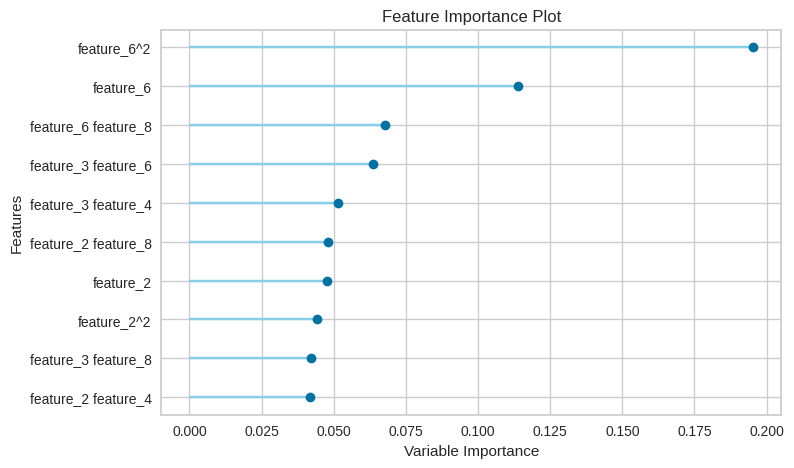

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
data_copy = data.copy()

encoder = LabelEncoder()

data_copy['feature_5_encoded'] = encoder.fit_transform(data_copy['feature_5'])

data_copy.drop(columns=['feature_5'], inplace=True)

np.seterr(under='ignore')

from pycaret.classification import *

# Configuración del experimento en PyCaret
exp_clf = setup(data=data_copy, target='target', session_id=42,
                polynomial_features=True, polynomial_degree=2, # Características polinómicas
                )

# Comparación de modelos para encontrar el mejor rendimiento
best = compare_models()
# plot feature importance
plot_model(best, plot = 'feature')
evaluate_model(best)

In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Datos de entrenamiento y prueba (asumiendo que X_train_resampled y y_train_resampled están definidos)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

def objective(trial):
    # Hiperparámetros basados en los obtenidos de PyCaret para optimizar
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # explorar alrededor de 100
        'max_depth': trial.suggest_int('max_depth', 1, 10),  # explorar alrededor de 3
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  # explorar alrededor de 2
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),  # explorar alrededor de 1
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),  # explorar alrededor de 0.1
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),  # explorar alrededor de 1.0
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])  # explorar alrededor de None
    }

    # Inicialización y entrenamiento del modelo
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_, y_train_)
    y_pred_proba = model.predict_proba(X_test_)[:, 1]

    # Cálculo de AUC
    auc_score = roc_auc_score(y_test_, y_pred_proba)
    return auc_score

# Creación y ejecución del estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Resultados de Optuna
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("AUC score correspondiente:", study.best_value)


[I 2024-04-19 19:44:27,608] A new study created in memory with name: no-name-ad1b3b3c-e9e9-42f7-a005-d2ef2e55e0a2
[I 2024-04-19 19:44:33,167] Trial 0 finished with value: 0.7651358850313035 and parameters: {'n_estimators': 104, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'learning_rate': 0.13131573957838538, 'subsample': 0.8839091058323107, 'max_features': None}. Best is trial 0 with value: 0.7651358850313035.
[I 2024-04-19 19:44:35,834] Trial 1 finished with value: 0.7105862265224815 and parameters: {'n_estimators': 284, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 2, 'learning_rate': 0.14890152172596094, 'subsample': 0.8600796258139792, 'max_features': None}. Best is trial 0 with value: 0.7651358850313035.
[I 2024-04-19 19:44:46,303] Trial 2 finished with value: 0.7638197211155378 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'learning_rate': 0.07877554405412898, 'subsample': 0.9738556560319596, 

Mejores hiperparámetros encontrados:
{'n_estimators': 161, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 3, 'learning_rate': 0.13774659965447872, 'subsample': 0.8566279594482116, 'max_features': 'log2'}
AUC score correspondiente: 0.7850384177575414


In [ ]:
study.best_params

{'n_estimators': 161,
 'max_depth': 10,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'learning_rate': 0.13774659965447872,
 'subsample': 0.8566279594482116,
 'max_features': 'log2'}

In [ ]:
print("AUC score correspondiente:", study.best_value)

AUC score correspondiente: 0.7850384177575414


In [ ]:
def objective(trial):
    # Hiperparámetros basados en los obtenidos de PyCaret para optimizar
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 130, 150),  # explorar alrededor de 139
        'max_depth': trial.suggest_int('max_depth', 6, 8),  # explorar alrededor de 7
        'min_samples_split': trial.suggest_int('min_samples_split', 4, 8),  # explorar alrededor de 6
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),  # explorar alrededor de 2
        'learning_rate': trial.suggest_float('learning_rate', 0.08, 0.2),  # explorar alrededor de 0.14
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),  # explorar alrededor de 0.91
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    # Inicialización y entrenamiento del modelo
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_, y_train_)
    y_pred_proba = model.predict_proba(X_test_)[:, 1]

    # Cálculo de AUC
    auc_score = roc_auc_score(y_test_, y_pred_proba)
    return auc_score

# Creación y ejecución del estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Resultados de Optuna
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("AUC score correspondiente:", study.best_value)

[I 2024-04-19 19:48:54,971] A new study created in memory with name: no-name-3ff5fd81-0a60-4a2d-8d73-f64a6a2d8aeb
[I 2024-04-19 19:48:59,999] Trial 0 finished with value: 0.7612407512805919 and parameters: {'n_estimators': 145, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 1, 'learning_rate': 0.12344800532692385, 'subsample': 0.9175901562226303, 'max_features': None}. Best is trial 0 with value: 0.7612407512805919.
[I 2024-04-19 19:49:01,178] Trial 1 finished with value: 0.7696535287421742 and parameters: {'n_estimators': 130, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 2, 'learning_rate': 0.17892294288425614, 'subsample': 0.8968841878907455, 'max_features': 'log2'}. Best is trial 1 with value: 0.7696535287421742.
[I 2024-04-19 19:49:02,182] Trial 2 finished with value: 0.7683017928286853 and parameters: {'n_estimators': 134, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 1, 'learning_rate': 0.18499690140250588, 'subsample': 0.9768620854785809

Mejores hiperparámetros encontrados:
{'n_estimators': 147, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 2, 'learning_rate': 0.09842399435885124, 'subsample': 0.9504055590104709, 'max_features': 'sqrt'}
AUC score correspondiente: 0.7900540694365397


In [ ]:
study.best_params

{'n_estimators': 147,
 'max_depth': 8,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'learning_rate': 0.09842399435885124,
 'subsample': 0.9504055590104709,
 'max_features': 'sqrt'}

In [ ]:
print("AUC score correspondiente:", study.best_value)

AUC score correspondiente: 0.7900540694365397


In [ ]:
# Definir los datos de entrenamiento y prueba
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Definir la función de objetivo para la optimización de Optuna
def objective(trial):
  classifier_name = trial.suggest_categorical("classifier", ["xgboost"])
  if classifier_name == 'xgboost':
    # Definir los hiperparámetros a sintonizar
    params = {
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['auc']),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'eta': trial.suggest_loguniform('eta', 1e-3, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
    }

    # Convertir los datos a un formato optimizado para XGBoost
    dtrain = xgb.DMatrix(X_train_, label=y_train_)
    dtest = xgb.DMatrix(X_test_, label=y_test_)

    model = xgb.train(params, dtrain, evals=[(dtest, "test")], early_stopping_rounds=10, verbose_eval=False)

    # Realizar predicciones en los datos de prueba
    y_pred_proba = model.predict(dtest)


  if classifier_name == 'RandomForest':
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
    }
    print(params)
    # Initialize the model
    model = RandomForestClassifier(random_state=42, **params)

    # Fit the model to the training data
    model.fit(X_train_, y_train_)
    # Realizar predicciones en los datos de prueba
    y_pred_proba = model.predict(X_test_)




  # Calcular el AUC score
  auc_score = roc_auc_score(y_test_, y_pred_proba)

  return auc_score

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros y su AUC score correspondiente
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("AUC score correspondiente:", study.best_value)

[I 2024-04-19 19:51:57,015] A new study created in memory with name: no-name-08a4397b-f8c7-4b22-b3c2-0d929104c0f6
[I 2024-04-19 19:51:57,116] Trial 0 finished with value: 0.7002436681844051 and parameters: {'classifier': 'xgboost', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 14, 'min_child_weight': 6.449382300680011, 'subsample': 0.7015346431052027, 'colsample_bytree': 0.6035095861091218, 'eta': 0.07348140622015367, 'lambda': 0.1706464456596216, 'alpha': 0.004909237346668011}. Best is trial 0 with value: 0.7002436681844051.
[I 2024-04-19 19:51:57,415] Trial 1 finished with value: 0.7193458309618669 and parameters: {'classifier': 'xgboost', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 14, 'min_child_weight': 0.705578047668113, 'subsample': 0.9035813040108193, 'colsample_bytree': 0.7790382683317731, 'eta': 0.05984544978235785, 'lambda': 0.006254087490691684, 'alpha': 1.2008089651905844}. Best is trial 1 with value: 0.7193458309618669.
[I 2024-

Mejores hiperparámetros encontrados:
{'classifier': 'xgboost', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 9, 'min_child_weight': 1.392674820856838, 'subsample': 0.9692265837674138, 'colsample_bytree': 0.5403300180945564, 'eta': 0.7327816361991378, 'lambda': 0.03203302015241345, 'alpha': 2.446697131140818}
AUC score correspondiente: 0.7559583096186682


In [ ]:
study.best_params


{'classifier': 'xgboost',
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'max_depth': 9,
 'min_child_weight': 1.392674820856838,
 'subsample': 0.9692265837674138,
 'colsample_bytree': 0.5403300180945564,
 'eta': 0.7327816361991378,
 'lambda': 0.03203302015241345,
 'alpha': 2.446697131140818}

In [ ]:
print("AUC score correspondiente:", study.best_value)

AUC score correspondiente: 0.7559583096186682


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(2455, 8)"
4,Transformed data shape,"(2455, 36)"
5,Transformed train set shape,"(1718, 36)"
6,Transformed test set shape,"(737, 36)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6700,0.6920,0.8444,0.6847,0.7561,0.2624,0.2771,0.6160
ridge,Ridge Classifier,0.6700,0.6904,0.8530,0.6822,0.7580,0.2585,0.2751,0.0350
lda,Linear Discriminant Analysis,0.6671,0.6886,0.8377,0.6840,0.7530,0.2578,0.2708,0.0360
gbc,Gradient Boosting Classifier,0.6647,0.6880,0.8319,0.6844,0.7507,0.2534,0.2648,0.5770
ada,Ada Boost Classifier,0.6426,0.6655,0.7820,0.6786,0.7264,0.2183,0.2227,0.2390
rf,Random Forest Classifier,0.6414,0.0000,0.7723,0.6796,0.7227,0.2207,0.2250,0.3630
et,Extra Trees Classifier,0.6379,0.0000,0.7502,0.6830,0.7147,0.2215,0.2241,0.2740
lightgbm,Light Gradient Boosting Machine,0.6292,0.0000,0.7464,0.6763,0.7093,0.2004,0.2023,0.3250
knn,K Neighbors Classifier,0.6216,0.0000,0.7569,0.6655,0.7076,0.1766,0.1803,0.0610
xgboost,Extreme Gradient Boosting,0.6210,0.0000,0.7416,0.6692,0.7033,0.1824,0.1845,0.2510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

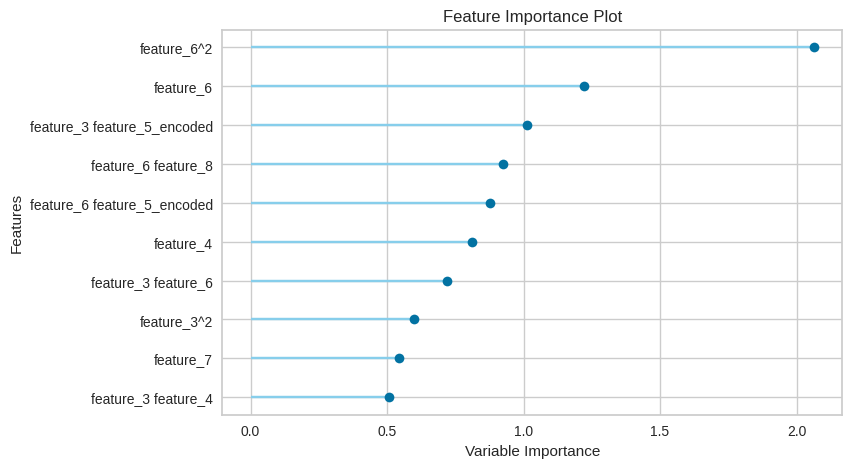

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install PyCaret

data_copy = data.copy()

encoder = LabelEncoder()

data_copy['feature_5_encoded'] = encoder.fit_transform(data_copy['feature_5'])

data_copy.drop(columns=['feature_5', 'feature_2'], inplace=True)

np.seterr(under='ignore')

from pycaret.classification import *

# Configuración del experimento en PyCaret
exp_clf = setup(data=data_copy, target='target', session_id=42,
                polynomial_features=True, polynomial_degree=2, # Características polinómicas
                )

# Comparación de modelos para encontrar el mejor rendimiento
best = compare_models()
# plot feature importance
plot_model(best, plot = 'feature')
evaluate_model(best)

In [ ]:
data.drop(columns=['feature_2'], inplace=True)

# Excluir la columna 'target' del conjunto de entrenamiento
training = data.drop(columns=['target'])

# Obtener la columna 'target' como el objetivo
target = data['target']

# Dividir el conjunto de datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)

# Crear el DataFrame 'training' sin la variable 'target'
training = X_train.copy()

# Crear el DataFrame 'test' con la variable 'target'
test = pd.concat([X_test, y_test], axis=1)

# Verificar las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento:", training.shape)
print("Forma del conjunto de prueba:", test.shape)

Forma del conjunto de entrenamiento: (1964, 7)
Forma del conjunto de prueba: (491, 8)


In [ ]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(train_data, test_data):
    """
    Aplica Label Encoding a las variables categóricas en los conjuntos de datos de entrenamiento y prueba.

    Parameters:
    train_data (DataFrame): El conjunto de datos de entrenamiento.
    test_data (DataFrame): El conjunto de datos de prueba.

    Returns:
    DataFrame: El conjunto de datos de entrenamiento con Label Encoding aplicado.
    DataFrame: El conjunto de datos de prueba con Label Encoding aplicado.
    """
    # Inicializar LabelEncoder
    label_encoder = LabelEncoder()

    # Iterar sobre las columnas categóricas y aplicar Label Encoding
    for col in train_data.select_dtypes(include=['object']).columns:
        train_data[col] = label_encoder.fit_transform(train_data[col])
        test_data[col] = label_encoder.transform(test_data[col])

    return train_data, test_data

# Aplicar Label Encoding a X_train y X_test
X_train_encoded, X_test_encoded = apply_label_encoding(X_train, X_test)

In [ ]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

def apply_polynomial_features(train_data, test_data, columns=[], degree=2):
    poly_features = PolynomialFeatures(degree=degree)
    if not columns:
      numeric_cols = train_data.select_dtypes(include=['int', 'float']).columns
    else:
      numeric_cols = columns
    train_data_poly = train_data.copy()
    test_data_poly = test_data.copy()
    train_data_poly = poly_features.fit_transform(train_data[numeric_cols])
    test_data_poly = poly_features.transform(test_data[numeric_cols])
    train_data_poly_df = pd.DataFrame(train_data_poly, index=train_data.index, columns=[f'poly_feature_{x}' for x in range(train_data_poly.shape[1])])
    test_data_poly_df = pd.DataFrame(test_data_poly, index=test_data.index, columns=[f'poly_feature_{x}' for x in range(test_data_poly.shape[1])])
    X_train_poly = pd.concat([train_data, train_data_poly_df], axis=1)
    X_test_poly = pd.concat([test_data, test_data_poly_df], axis=1)

    return X_train_poly, X_test_poly

X_train_encoded, X_test_encoded = apply_polynomial_features(X_train_encoded, X_test_encoded, columns=[], degree=2)

In [ ]:
#Resampling Techniques - Over-sampling with SMOTE

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def apply_scaling(train_data, test_data):
    scaler = MinMaxScaler()
    train_data_scaled = train_data.copy()
    train_data_scaled[train_data.columns] = scaler.fit_transform(train_data)
    test_data_scaled = test_data.copy()
    test_data_scaled[test_data.columns] = scaler.transform(test_data)

    return train_data_scaled, test_data_scaled

X_train_normalized, X_test_normalized = apply_scaling(X_train_resampled, X_test_encoded)

In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Datos de entrenamiento y prueba (asumiendo que X_train_resampled y y_train_resampled están definidos)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

def objective(trial):
    # Hiperparámetros basados en los obtenidos de PyCaret para optimizar
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # explorar alrededor de 100
        'max_depth': trial.suggest_int('max_depth', 1, 10),  # explorar alrededor de 3
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  # explorar alrededor de 2
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),  # explorar alrededor de 1
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),  # explorar alrededor de 0.1
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),  # explorar alrededor de 1.0
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])  # explorar alrededor de None
    }

    # Inicialización y entrenamiento del modelo
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_, y_train_)
    y_pred_proba = model.predict_proba(X_test_)[:, 1]

    # Cálculo de AUC
    auc_score = roc_auc_score(y_test_, y_pred_proba)
    return auc_score

# Creación y ejecución del estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Resultados de Optuna
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("AUC score correspondiente:", study.best_value)

[I 2024-04-19 19:53:04,405] A new study created in memory with name: no-name-55982044-d9fd-4bb0-952c-a5e517eabb3c
[I 2024-04-19 19:53:04,663] Trial 0 finished with value: 0.7037919749573136 and parameters: {'n_estimators': 120, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5, 'learning_rate': 0.051987119466062555, 'subsample': 0.9799328503499982, 'max_features': 'log2'}. Best is trial 0 with value: 0.7037919749573136.
[I 2024-04-19 19:53:06,024] Trial 1 finished with value: 0.7466740182128628 and parameters: {'n_estimators': 56, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 5, 'learning_rate': 0.1623645640112814, 'subsample': 0.8957462584191059, 'max_features': None}. Best is trial 1 with value: 0.7466740182128628.
[I 2024-04-19 19:53:06,554] Trial 2 finished with value: 0.7124537564029596 and parameters: {'n_estimators': 285, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1, 'learning_rate': 0.19333448782246865, 'subsample': 0.9877570343405274

Mejores hiperparámetros encontrados:
{'n_estimators': 172, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 4, 'learning_rate': 0.1023644462774834, 'subsample': 0.8655033755652183, 'max_features': 'sqrt'}
AUC score correspondiente: 0.7755051223676721
